# Time Series Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Manipulating Time Series Data in Python

### 1.1 Working with Time Series

In [3]:
#Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

#Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [4]:
google = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv')
google.head(1)

,Date,Close
0,2014-01-02,556.0


In [5]:
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [6]:
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


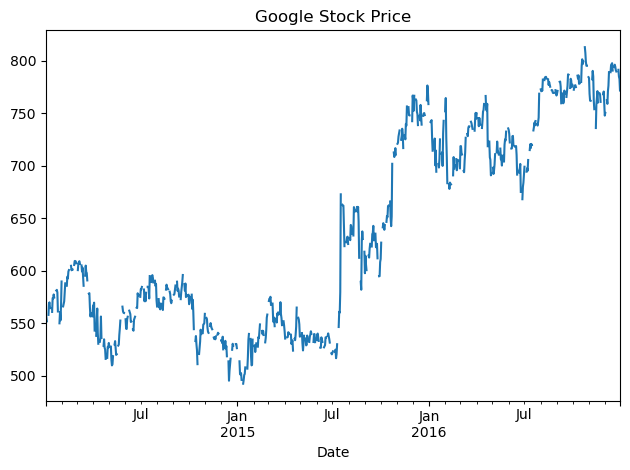

In [15]:
google.Close.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

In [21]:
#Indexing
google['2015'][:5]

C:\Users\M0201420\AppData\Local\Temp\ipykernel_21168\2796543237.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'][:5]


,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87


In [24]:
google.loc['2015-1-2','Close']

524.81

In [27]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 49.4 KB


In [34]:
#Higher frequency, missing data
google.asfreq('M')[:5]

,Close
Date,
2014-01-31,589.89
2014-02-28,607.22
2014-03-31,556.70
2014-04-30,526.66
2014-05-31,NaN


In [35]:
#Business Days
google.asfreq('B')[:5]

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


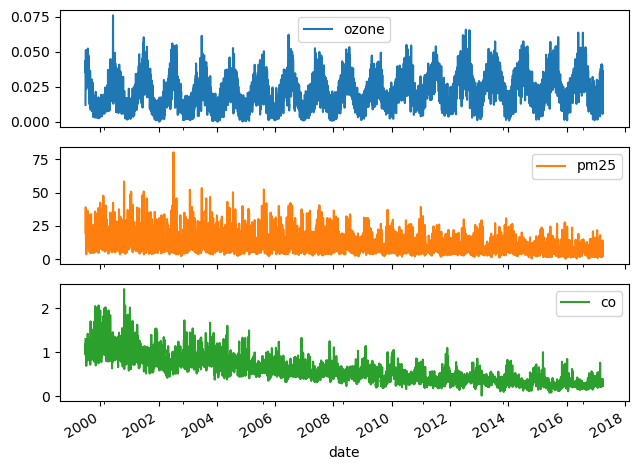

In [40]:
#---------EXCERCISE---------


data = pd.read_csv(r'C:\Github\Learning\Datasets\Time_Series\air_quality_data\nyc.csv')

#Inspect data
#print(data.info())

#Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

#Set date column as index
data.set_index('date', inplace=True)

#Inspect data 
#print(data.info())

#Plot data
data.plot(subplots=True)
plt.tight_layout()
plt.show()

In [47]:
prices = pd.DataFrame()

for year in ['2014', '2015', '2016']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2014,2015,2016
0,556.00,NaN,NaN
1,551.95,524.81,NaN
2,NaN,NaN,NaN
3,NaN,NaN,741.84
4,558.10,513.87,742.58


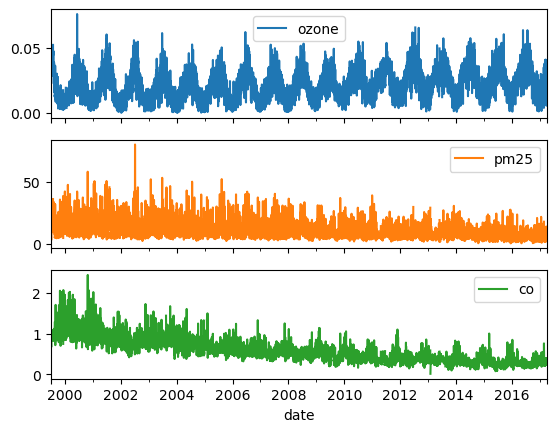

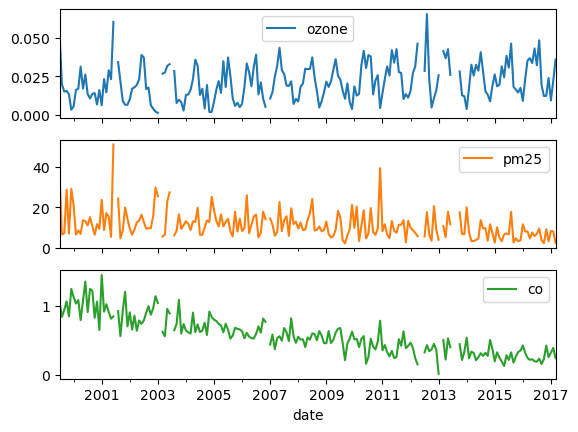

In [50]:

#---------EXCERCISE---------

#Set the frequency to calendar daily
co = data.asfreq('D')

#Plot the data
co.plot(subplots=True)
plt.show()


#Set frequency to monthly
co = data.asfreq('M')

#Plot the data
co.plot(subplots=True)
plt.show()

In [88]:
path = r'C:\Github\Learning\Datasets\Time_Series\stock_data\google.csv'
google2 = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
google2.head(1)

,Close
Date,
2014-01-02,556.0


In [74]:
#shift attribute
#'periods' parameter

#google['shifted'] = google.Close.shift()
#google['lagged'] = google.Close.shift(periods=-1)
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,NaN
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,558.10
2014-01-06,558.10,NaN,568.86


In [93]:
#Financial Return
google['change'] = google.Close.div(google.shifted)
google['return'] = google.change.sub(1).mul(100)
google['diff'] = google.Close.diff()
google['pct_change'] = google.Close.pct_change().mul(100)
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google.head(6)


#Create daily_return
#google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

#Create monthly_return
#google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

#Create annual_return
#google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

,Close,shifted,lagged,change,return,diff,pct_change,return_3d
Date,,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-4.05,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,-0.728417
2014-01-06,558.10,NaN,568.86,NaN,NaN,NaN,1.114231,1.114231
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,10.76,1.927970,3.063683


### 1.2 Basic Time Series Metrics & Resampling

#### Compare time series growth rates

1. Normalize price series to start at 100
2. Divide all prices by first in series, multiply by 100
    * Same starting point
    * All prices relative to starting point

In [7]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
